In [132]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns 
%matplotlib inline 

In [2]:
train = pd.read_csv('/Users/kubla/Documents/Kubla/Credit Risk/train.csv')
test = pd.read_csv('/Users/kubla/Documents/Kubla/Credit Risk/test.csv')
train.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,...,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,...,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,...,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


In [3]:
train.describe()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.0000,...,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,167559.187200,1.606760,1.853320,1.553200,35.481640,-0.020000,-0.137880,-0.169760,-0.2238,...,43266.200000,40289.261640,38842.113240,5642.769880,5.975874e+03,5231.979040,4873.475160,4793.889240,5248.531440,0.221920
std,7217.022701,129634.881264,0.488479,0.790892,0.521594,9.228484,1.118915,1.192898,1.193968,1.1641,...,64561.637962,60950.000675,59567.841188,15745.370388,2.293476e+04,16331.189806,15649.697239,15143.116895,17972.259959,0.415546
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.0000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6250.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.0000,...,2307.000000,1740.000000,1247.750000,977.250000,8.360000e+02,390.000000,291.000000,263.250000,117.750000,0.000000
50%,12500.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.0000,...,18983.000000,18041.000000,17000.000000,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,18750.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.0000,...,53982.000000,49925.750000,49016.500000,5022.000000,5.000000e+03,4574.250000,4015.000000,4056.250000,4000.000000,0.000000
max,25000.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.0000,...,706864.000000,823540.000000,699944.000000,505000.000000,1.684259e+06,508229.000000,528897.000000,426529.000000,528666.000000,1.000000


In [23]:
train.dtypes
#train.X11.value_counts()

id     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

### Check correlation of payment features against each other

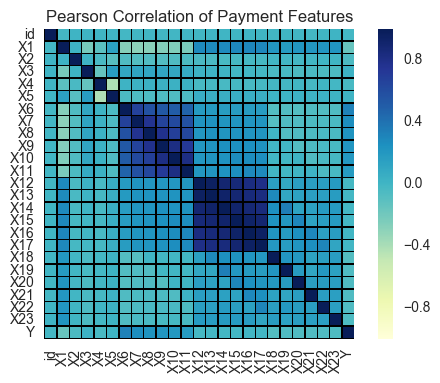

In [8]:
# df = train.drop(train.columns[[0, 2, 3, 4]], axis=1) 
plt.title('Pearson Correlation of Payment Features')
sns.heatmap(train.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')

### Recode "Age" as categorical data: < 25 yrs, 25 - 40 yrs, 40 - 50 yrs, 50+ yrs 

In [24]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

df = train.copy()
cut_points = [25,35,45]
labels = ["<25","25-35","35-45","50+"]
df["X5_Bin"] = binning(df["X5"], cut_points, labels)
test["X5_Bin"] = binning(test["X5"], cut_points, labels)
#pd.value_counts(df["X5_Bin"], sort=False)
df[['X5_Bin','Y']].groupby('X5_Bin').mean()

,Y
X5_Bin,
<25,0.268519
25-35,0.198330
35-45,0.218701
50+,0.254155


In [25]:
df[['X5_Bin','Y']].groupby('X5_Bin').size()

X5_Bin
<25       3240
25-35    10780
35-45     7069
50+       3911
dtype: int64

In [26]:
df.columns

Index(['id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y', 'X5_Bin'],
      dtype='object')

In [28]:
df[df.columns[[2, 3, 4, 25]]] = df[df.columns[[2, 3, 4, 25]]].apply(lambda x: x.astype('category'))
test[test.columns[[2, 3, 4, 24]]] = test[test.columns[[2, 3, 4, 24]]].apply(lambda x: x.astype('category'))

In [29]:
# check percentage of Y
df.Y.value_counts()/df.shape[0]

0    0.77808
1    0.22192
Name: Y, dtype: float64

### Change categorical data into dummy variable data

In [30]:
df = pd.get_dummies(df,columns=df.columns[[2, 3, 4, 25]])
test = pd.get_dummies(test,columns=test.columns[[2, 3, 4, 24]])

In [36]:
df.columns

Index(['id', 'X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13',
       'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23',
       'Y', 'X2_1', 'X2_2', 'X3_0', 'X3_1', 'X3_2', 'X3_3', 'X3_4', 'X3_5',
       'X3_6', 'X4_0', 'X4_1', 'X4_2', 'X4_3', 'X5_Bin_<25', 'X5_Bin_25-35',
       'X5_Bin_35-45', 'X5_Bin_50+'],
      dtype='object')

In [310]:
#df = df.drop(df.columns[[0,3,4,5,6,7,10,11,12,13,14]], axis=1)
#df.columns

### Normalization for continuous variables

In [37]:
from sklearn import preprocessing
#df[['X18','X19','X20','X21','X22','X23']] = preprocessing.scale(df[['X18','X19','X20','X21','X22','X23']])
df[['X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']] = preprocessing.scale(df[['X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']])
df = df.drop(df.columns[[0,2]], axis = 1)

test[['X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']] = preprocessing.scale(test[['X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']])
test = test.drop(test.columns[[0,2]], axis = 1)

## Binary Classification Models

In [70]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn.preprocessing import scale, StandardScaler, Imputer, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm

In [118]:
def search_model(x_train, y_train, est, param_grid, n_jobs = -1, cv = 10, refit=False):
##Grid Search for the best model
    model = GridSearchCV(estimator = est,
                         param_grid = param_grid,
                         scoring = 'roc_auc',
                         #verbose = 10,
                         n_jobs = n_jobs,
                         iid = True,
                         refit = refit,
                         cv = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:", model.best_params_)
    #print("Scores:", model.grid_scores_)   
    #print('Best score: {}'.format(model.best_score_))
    #print('Best parameters: {}'.format(model.best_params_))
    return model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(df.columns[19], axis=1), df.Y, test_size=0.30, random_state=42)
weights = {0:1, 1:3}

## Use Random Forest model as baseline model

In [50]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.94      0.88      5844
          1       0.62      0.33      0.43      1656

avg / total       0.79      0.81      0.78      7500



## Logistic Regression with Ridge

In [95]:
import numpy as np
np.random.seed(1234)
weights = {0:1, 1:3}
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]}
log_ridge = linear_model.LogisticRegression(class_weight = weights, penalty='l2')
model_ridge = search_model(X_train, y_train, est = log_fit, param_grid= param_grid)

Best score: 0.719
Best parameters set: {'C': 5}


## Logistic regression with Lasso

In [110]:
import numpy as np
np.random.seed(1234)
weights = {0:1, 1:5}
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]}
log_lasso = linear_model.LogisticRegression(class_weight = weights, penalty='l1')
model_lasso = search_model(X_train, y_train, est = log_fit, param_grid= param_grid)

Best score: 0.7190839323259411
Best parameters: {'C': 5}


In [69]:
#log_fit.fit(X_train, y_train)
#y_pred = log_fit.predict(X_test)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
#metrics.auc(fpr, tpr)

## SVM

In [168]:
from sklearn import svm
param_grid = {'C' : [1,2,5,10],
              'random_state' : [1234]}
svc = svm.SVC(probability=True, class_weight = weights)
model_svc = search_model(X_train, y_train, est = svc, param_grid= param_grid, cv=5)

Best score: 0.758
Best parameters set: {'random_state': 1234, 'C': 1}


## Random Forest

In [169]:
np.random.seed(1234)
param_grid = {'min_samples_leaf' : [5, 10, 16, 20, 25, 30],
              'n_estimators':[50, 100, 300, 500, 700, 1000],
              'criterion':['gini', 'entropy']}
#rf = search_model(RandomForestClassifier(), X_train, y_train, param_grid)
model_rf = search_model(X_train, y_train, est = RandomForestClassifier(), param_grid = param_grid)

Best score: 0.779
Best parameters set: {'min_samples_leaf': 30, 'n_estimators': 500, 'criterion': 'entropy'}


## k-nearest neighbors

In [166]:
from sklearn.neighbors import KNeighborsClassifier
k = np.array([1,5,10,20,50,100])
param_grid = {'n_neighbors': k}
knn = KNeighborsClassifier(weights = 'uniform', n_jobs = -1)
model_knn = search_model(X_train, y_train, est = knn, param_grid= param_grid, cv = 5)

Best score: 0.754
Best parameters set: {'n_neighbors': 100}


# Voting Classifier

In [175]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
model_ridge = linear_model.LogisticRegression(C = 5, class_weight = weights, penalty='l2')
model_lasso = linear_model.LogisticRegression(C = 5,class_weight = weights, penalty='l1')
model_rf = RandomForestClassifier(min_samples_leaf = 30,n_estimators = 500, random_state = 1234, criterion = 'entropy')
model_knn = KNeighborsClassifier(n_neighbors = 100)
model_svm = svm.SVC(C = 1, probability=True, class_weight = weights, random_state = 1234)

eclf = VotingClassifier(estimators=[('Logistic regression with ridge', model_ridge),
                                    ('Logistic regression with ridge', model_lasso),
                                    ('Random_Forest', model_rf),
                                    ('KNN', model_knn), 
                                    ('SVM', model_svm)], 
                        voting='hard')

for clf, label in zip([model_ridge, model_lasso, model_rf, model_knn, model_svm], 
                      ['Logistic regression with ridge', 'Logistic regression with ridge', 'Random_Forest', 'KNN', 'SVM']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.41 (+/- 0.00) [Logistic regression with ridge]
Accuracy: 0.41 (+/- 0.00) [Logistic regression with ridge]
Accuracy: 0.46 (+/- 0.01) [Random_Forest]
Accuracy: 0.39 (+/- 0.02) [KNN]
Accuracy: 0.49 (+/- 0.00) [SVM]
